In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Preprocessed
!ls

/content/drive/MyDrive/Preprocessed
'African Jambo'   Fazlee	      Maryam
 Aprupali	 'Gopal Vog'	      Modhurani
'Baper Bari'	  Haribhanga	     'Phillipine Honey Dew'
'Bari 11'	 'Him Sagor'	      Qzai
'Bari 13'	  image_data_pp.npy  'Red Palmar'
'Bari 4'	 'Indian Totapori'    Sabira
'Bari 7'	 'Kacha Mitha'	     'Taiwani Red'
'Bari 8'	 'King Breunei'      'Thai Banana Mango'
'Bari 9'	  Lengra	     'Thai Moryam'


In [3]:
listOfProjati = []
ProjatiDirectory = {}
import os
path = os.getcwd()
for dir in os.listdir(path):
  if os.path.isdir(dir):
    if str(dir) != "thai banana mango (renamed)" and str(dir) != "Jubair":
      listOfProjati.append(str(dir))
      ProjatiDirectory[str(dir)] = '/' + str(dir)
ProjatiDirectory

{'Lengra': '/Lengra',
 'Fazlee': '/Fazlee',
 'Haribhanga': '/Haribhanga',
 'Thai Banana Mango': '/Thai Banana Mango',
 'Bari 7': '/Bari 7',
 'Bari 11': '/Bari 11',
 'Bari 4': '/Bari 4',
 'Bari 8': '/Bari 8',
 'African Jambo': '/African Jambo',
 'Sabira': '/Sabira',
 'Phillipine Honey Dew': '/Phillipine Honey Dew',
 'Maryam': '/Maryam',
 'Indian Totapori': '/Indian Totapori',
 'Kacha Mitha': '/Kacha Mitha',
 'Thai Moryam': '/Thai Moryam',
 'Modhurani': '/Modhurani',
 'Baper Bari': '/Baper Bari',
 'Red Palmar': '/Red Palmar',
 'King Breunei': '/King Breunei',
 'Taiwani Red': '/Taiwani Red',
 'Qzai': '/Qzai',
 'Him Sagor': '/Him Sagor',
 'Gopal Vog': '/Gopal Vog',
 'Bari 13': '/Bari 13',
 'Aprupali': '/Aprupali',
 'Bari 9': '/Bari 9'}

In [5]:
countDict = {}
for projati in listOfProjati:
  subfolderPath = path + ProjatiDirectory[projati]
  c = 0
  for file in os.listdir(subfolderPath):
    if file.endswith('.jpg') or file.endswith('.JPG') or file.endswith('.jpeg') or file.endswith('.JPEG') or file.endswith('.png') or file.endswith('.PNG'):
      # file_name, file_extension = os.path.splitext(file)
      c += 1
  countDict[projati] = c
countDict

{'Lengra': 366,
 'Fazlee': 600,
 'Haribhanga': 600,
 'Thai Banana Mango': 612,
 'Bari 7': 600,
 'Bari 11': 600,
 'Bari 4': 600,
 'Bari 8': 600,
 'African Jambo': 600,
 'Sabira': 624,
 'Phillipine Honey Dew': 708,
 'Maryam': 1044,
 'Indian Totapori': 726,
 'Kacha Mitha': 846,
 'Thai Moryam': 882,
 'Modhurani': 600,
 'Baper Bari': 600,
 'Red Palmar': 414,
 'King Breunei': 612,
 'Taiwani Red': 354,
 'Qzai': 810,
 'Him Sagor': 438,
 'Gopal Vog': 600,
 'Bari 13': 510,
 'Aprupali': 600,
 'Bari 9': 600}

In [12]:
%cd /content/drive/MyDrive/Preprocessed
!ls

/content/drive/MyDrive/Preprocessed
'African Jambo'   Fazlee	      Maryam
 Aprupali	 'Gopal Vog'	      Modhurani
'Baper Bari'	  Haribhanga	     'Phillipine Honey Dew'
'Bari 11'	 'Him Sagor'	      Qzai
'Bari 13'	  image_data_pp.npy  'Red Palmar'
'Bari 4'	 'Indian Totapori'    Sabira
'Bari 7'	 'Kacha Mitha'	     'Taiwani Red'
'Bari 8'	 'King Breunei'      'Thai Banana Mango'
'Bari 9'	  Lengra	     'Thai Moryam'


In [ ]:
import numpy as np
img_data=np.load('image_data_pp.npy')
img_data

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

In [14]:
listOfProjatiCopy = listOfProjati.copy()
listOfProjatiCopy

['Lengra',
 'Fazlee',
 'Haribhanga',
 'Thai Banana Mango',
 'Bari 7',
 'Bari 11',
 'Bari 4',
 'Bari 8',
 'African Jambo',
 'Sabira',
 'Phillipine Honey Dew',
 'Maryam',
 'Indian Totapori',
 'Kacha Mitha',
 'Thai Moryam',
 'Modhurani',
 'Baper Bari',
 'Red Palmar',
 'King Breunei',
 'Taiwani Red',
 'Qzai',
 'Him Sagor',
 'Gopal Vog',
 'Bari 13',
 'Aprupali',
 'Bari 9']

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(listOfProjatiCopy)
listOfProjatiCopy = le.transform(listOfProjatiCopy)
listOfProjatiCopy

array([16,  9, 11, 24,  6,  3,  5,  7,  0, 22, 19, 17, 13, 14, 25, 18,  2,
       21, 15, 23, 20, 12, 10,  4,  1,  8])

In [16]:
target_val = []
for i in range(len(listOfProjati)):
  tempList = [listOfProjatiCopy[i]]*countDict[listOfProjati[i]]
  target_val.extend(tempList)
target_val = np.array(target_val)
target_val

array([16, 16, 16, ...,  8,  8,  8])

In [17]:
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(img_data,target_val,test_size=0.3, stratify=target_val)
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.2, stratify=y)

In [18]:
print((x_train.shape,y_train.shape))
print((x_test.shape,y_test.shape))
print((x_val.shape,y_val.shape))

((9041, 128, 128, 3), (9041,))
((4844, 128, 128, 3), (4844,))
((2261, 128, 128, 3), (2261,))


In [19]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [20]:
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((9041, 128, 128, 3), (9041, 26))
((2261, 128, 128, 3), (2261, 26))
((4844, 128, 128, 3), (4844, 26))


In [21]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator()
val_generator = ImageDataGenerator()
test_generator = ImageDataGenerator()
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [22]:
# import seaborn as sns
import itertools
from sklearn.metrics import confusion_matrix
from keras import Sequential
from tensorflow.keras.applications.xception import Xception
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten, Dense, BatchNormalization, Activation,Dropout

In [23]:
inc = Xception(include_top=False, weights='imagenet', input_shape=(128,128,3), classes=y_train.shape[1])

83683744/83683744 [==============================] - 1s 0us/step


In [31]:
model_inc = Sequential()
model_inc.add(inc)
model_inc.add(Flatten())
# model_inc.add(Dense(1024,activation=('relu'),input_dim=512))
# model_inc.add(Dense(512,activation=('relu')))
# model_inc.add(Dense(256,activation=('relu')))
# model_inc.add(Dropout(.3))
# model_inc.add(Dense(128,activation=('relu')))
# model_inc.add(Dropout(.2))
model_inc.add(Dense(26,activation=('softmax')))

In [32]:
batch_size= 36
epochs=30
learning_rate=.001
sgd=SGD(learning_rate,momentum=.9,nesterov=False)

In [33]:
model_inc.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
lrr= ReduceLROnPlateau(monitor='val_accuracy', factor=.01,  patience=3, min_lr=1e-5)

In [34]:
hist = model_inc.fit(train_generator.flow(x_train, y_train, batch_size = batch_size), epochs=epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size = batch_size), callbacks = [lrr], verbose = 1)

  8/334 [..............................] - ETA: 53:54 - loss: 3.3641 - accuracy: 0.0509

KeyboardInterrupt: ignored

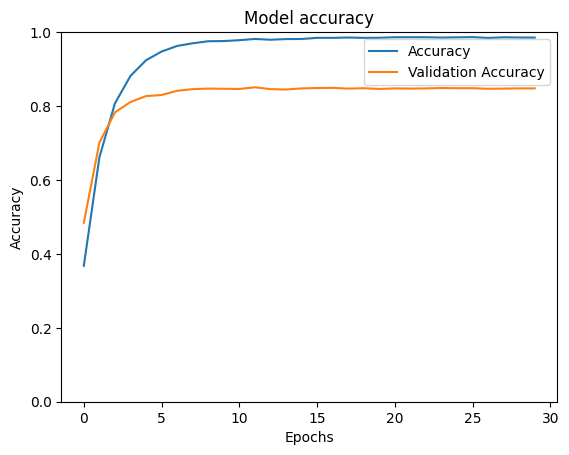

In [ ]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.ylim(0,1)
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

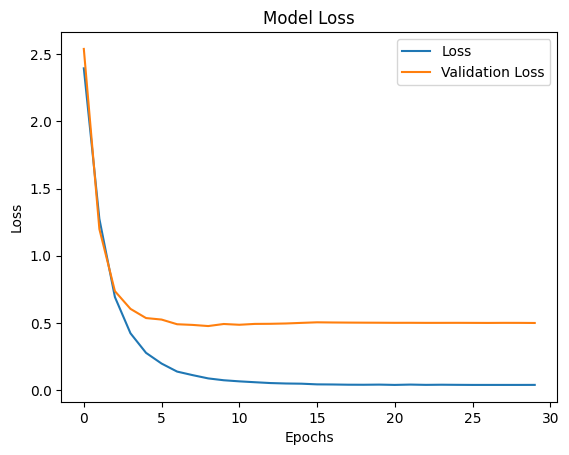

In [ ]:
plt.plot(hist.history["loss"])
plt.plot(hist.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Loss","Validation Loss"])
plt.show()

In [ ]:
y_pred1 = model_inc.predict(x_test)
y_true = np.argmax(y_pred1,axis=1)
y_demo = np.argmax(y_test,axis=1)

136/136 [==============================] - 4s 23ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_demo)

0.8461004397130294

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true, y_demo, average='weighted')

0.8453778938327472

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_true,y_demo,average='weighted')

0.8461004397130294

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_true,y_demo,average='weighted')

0.8461101400352993

In [ ]:
from sklearn.metrics import classification_report
target_names=listOfProjati
print(classification_report(y_true, y_demo, target_names=target_names))

                      precision    recall  f1-score   support

              Bari-4       0.96      0.97      0.97       129
              BARI 7       0.83      0.85      0.84       291
              BARI 9       0.64      0.53      0.58       106
              BARI 8       0.60      0.58      0.59        26
             BARI 11       0.16      0.13      0.14        46
             BARI 13       0.93      0.88      0.90       149
              BARI 4       0.95      0.95      0.95       198
       African Jumbo       0.92      0.94      0.93        52
         Baper baari       0.26      0.22      0.24        64
             Bari 11       0.14      0.18      0.16        28
   thai banana mango       0.08      0.09      0.08        35
          Red Palmar       0.88      0.95      0.91       169
           Modhurani       0.97      0.89      0.93        95
         King Brunei       0.81      0.87      0.84        85
         Hari-Bhanga       0.84      0.88      0.86       162
       

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_demo)

In [ ]:
from tensorflow import keras
model = keras.models.load_model('XceptionNet')